###  Trabajo práctico Módulo 5

## Modelamiento de difusión de oxígeno en una piscina 

#### MOOC: Transferencia de Calor y Masa Computacional

Imagine que usted trabaja en el Centro de Investigación en Acuicultura Sostenible, donde se desarrollan tecnologías para mejorar la crianza de alevines. Su tarea consiste en diseñar un sistema que optimice la concentración de oxígeno en un tanque cilíndrico utilizado para la cría de alevines de peces. En este tanque, burbujas de aire enriquecidas con oxígeno son inyectadas a través del centro para asegurar un ambiente saludable para el crecimiento de los peces.

Descripción del Sistema
El tanque cilíndrico tiene un radio de 2.5 metros y una altura de 2 metros. Las burbujas de aire son inyectadas desde la base del tanque hacia el centro, en un área con un radio de 0.5 metros, promoviendo la disolución del oxígeno en el agua y asegurando que la concentración se mantenga dentro de un rango óptimo para los alevines. Se requiere que la concentración de oxígeno no baje de 6 mg/L, ya que concentraciones inferiores pueden afectar negativamente el crecimiento y la salud de los alevines.

### Ecuación gobernante y condiciones de borde

La ecuación de conservación de oxígeno en el tanque en estado estacionario es

$$ v_z\frac{\partial c}{\partial z} = D[\frac{1}{r}\frac{\partial }{\partial r}(r\frac{\partial c}{\partial r}) +\frac{\partial^2 c}{\partial z}] - kc$$


Las condiciones de borde asociadas a las paredes exterior e inferior:

Fondo del tanque con burbujas
$$ CB1: \ C(r\leq R_1,z=0)= C_0$$


Fondo del tanque sin burbujas
$$ CB2: \ \frac{\partial}{\partial z}  C(r\geq R_1,z=0)= 0$$

Pared exterior sin flux
$$ CB3: \frac{\partial}{\partial r}  C(r= R_2,z)= 0$$

Ecuación solubilidad del oxígeno en el agua
$$ CB4: \ C(r,z=H)= k\cdot C_0$$

Centro del tanque
$$ CB5: \ \frac{\partial}{\partial z}  C(r=0,z)= 0$$



#### 1. Importar módulos

In [1]:
# Visualización de datos y gráficos
import matplotlib.pyplot as plt 

# Computación numérica
import numpy as np

#### 2. Inicializar parámetros geométricos y físicos constantes del problema
* Defina las propiedades termofísicas del problema


In [2]:
# Concentración máxima de oxígeno en el centro de la barra dispensadora / mol m^-3
MW = 32 # g/mol

# Cálculo de concentración en mol / m3 1 mg/L = 1g/m3
ca_0 = 8 / MW * 1e3 # mmol/m3

# Concentración de oxígeno en la interfase piscina-aire
c_sup = ca_0

# Velocidad de consumo de O2 en el agua
k = 2e-9

# Constante de solubilidad de oxígeno en el agua
k_con = 5e-15

# Difusividad del oxígeno en el agua / m^2 s^-1
D = 2.10e-9

# Radio 1 de la piscina en x / m
R1 = 0.5

# Radio 2 de la piscina en y / m
R2 = 2.5

# Profundidad de la piscina / m
lz = 2

# Flux
flux = 0.5

# Velocidad de las burbujas / m s^-1
v_z1 = 1e-11

v_z2 = -v_z1 / ((R2 / R1) ** 2 - 1)

v_z = v_z1

# Imprimir todas las cantidades calculadas
print(f"Peso molecular del oxígeno (MW): {MW} g/mol")
print(f"Concentración inicial de oxígeno (ca_0): {ca_0} mmol/m³")
print(f"Concentración de oxígeno en la interfase piscina-aire (c_sup): {c_sup} mmol/m³")
print(f"Velocidad de consumo de O2 en el agua (k): {k}")
print(f"Constante de solubilidad de oxígeno en el agua (k_con): {k_con}")
print(f"Difusividad del oxígeno en el agua (D): {D} m²/s")
print(f"Radio 1 de la piscina en x (R1): {R1} m")
print(f"Radio 2 de la piscina en y (R2): {R2} m")
print(f"Profundidad de la piscina (lz): {lz} m")
print(f"Flujo (flux): {flux}")
print(f"Velocidad de las burbujas (v_z1): {v_z1} m/s")
print(f"Velocidad de las burbujas ajustada (v_z2): {v_z2} m/s")
print(f"Velocidad de las burbujas (v_z): {v_z} m/s")


Peso molecular del oxígeno (MW): 32 g/mol
Concentración inicial de oxígeno (ca_0): 250.0 mmol/m³
Concentración de oxígeno en la interfase piscina-aire (c_sup): 250.0 mmol/m³
Velocidad de consumo de O2 en el agua (k): 2e-09
Constante de solubilidad de oxígeno en el agua (k_con): 5e-15
Difusividad del oxígeno en el agua (D): 2.1e-09 m²/s
Radio 1 de la piscina en x (R1): 0.5 m
Radio 2 de la piscina en y (R2): 2.5 m
Profundidad de la piscina (lz): 2 m
Flujo (flux): 0.5
Velocidad de las burbujas (v_z1): 1e-11 m/s
Velocidad de las burbujas ajustada (v_z2): -4.1666666666666664e-13 m/s
Velocidad de las burbujas (v_z): 1e-11 m/s


#### 3. Generar grilla 2-D
Luego visualizar grilla 2-D utilizando la funcion `meshgrid` de numpy

In [3]:
# Numero de elementos de la grilla en y
Nz=51*1

# Numero de elementos de la grilla en r
Nr=51*1

# Calcular el paso en espacio en la coordenada y
dz=lz/(Nz-1)

# Calcular el paso en espacio en la coordenada x
dr=R2/(Nr-1)

# Definimos vector con las coordenadas de cada punto en el espacio en y.
z_grilla=np.linspace(0,lz,Nz)

# Definimos vector con las coordenadas de cada punto en el espacio en x.
r_grilla=np.linspace(0,R2,Nr)

# Nodo donde está R1
nr1=round(Nr/5)

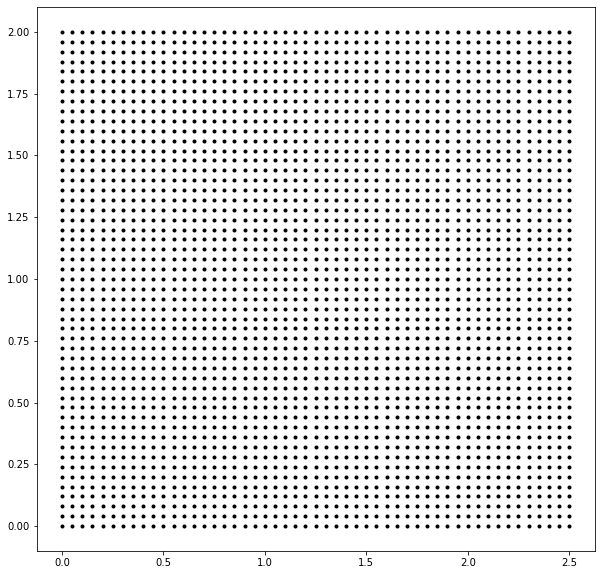

In [4]:
# Visualizar grilla 2-D
fig, ax=plt.subplots(figsize=(10,10))
R,Z=np.meshgrid(r_grilla,z_grilla)
ax.plot(R,Z,"k.")

#### 4. Discretizar el problema de difusión 2-D en puntos interiores del dominio y en bordes
* Diferencias finitas centrales de segundo orden en el espacio para las derivadas espaciales
* Agrupar los coeficientes de cada concentración formando un esténcil de cinco puntos para aplicar método SOR
* Diferencias finitas hacia atrás o adelante de segundo orden en el espacio para las condiciones de borde que consideren un flux
* Utilizar una condicion de borde de Dirichlet para paredes que cosideran valor de concentración constante

#### 5. Definir parametros de método numérico SOR
* Definir coeficiente SOR para los nodos interiores en el dominio 2-D
* Definir parámetro de sobre-relajación y tolerancia

In [5]:
# Coeficiente correspondiente a nodo vecino derecho
#a=D/(2*dr*r)+D/dr**2

# Coeficiente correspondiente a nodo vecino izquierdo
#b=-D/(2*dr*r)+D/dr**2

                        
# Coeficiente correspondiente a nodo vecino superior
c= -D/dz**2

# Coeficiente correspondiente a nodo vecino inferior
d= -v_z1/(2*dz)-D/dz**2

# Coeficiente correspondiente a nodo central
e= +2*D/dz**2 +2*D/dr**2 + v_z/dz + k
                        

# Coeficiente correspondiente a termino constante
f=0

In [6]:
print(c,d,e)

-1.3125000000000001e-06 -1.3126250000000002e-06 4.30725e-06


#### 6. Inicializar arreglo con valores de solución y condiciones de borde
* Iniciar arreglo para almacenar concentraión de Cloro
* Evaluar y almacenar valores de concentración utilizando las condiciones de borde
* Visualizar las condiciones de borde para chequear su correcta implementación

In [7]:
# Inicializamos arreglo para almacenar los valores solución de la concentration de aroma
ca=np.ones((Nr,Nz))*0

# Aplicamos las condiciones de borde 

# CB1 Fondo con burbujas, para r<R1
ca[1:nr1,0]=ca_0 

# CB2 Fondo sin burbujas, para r>R1
ca[nr1:-1,0]=(4*ca[nr1:-1,1]-ca[nr1:-1,2])/3

# CB3 Pared exterior
ca[-1,:]=(4*ca[-2,:]-ca[-3,:])/3

# CB4 Superficie del tanque
ca[:,-1]=(4*ca[:,-2]-ca[:,-3])/3

# CB5 Centro de la piscina (lado izquierdo)
ca[0,:]=(4*ca[1,:]-ca[2,:])/3
           

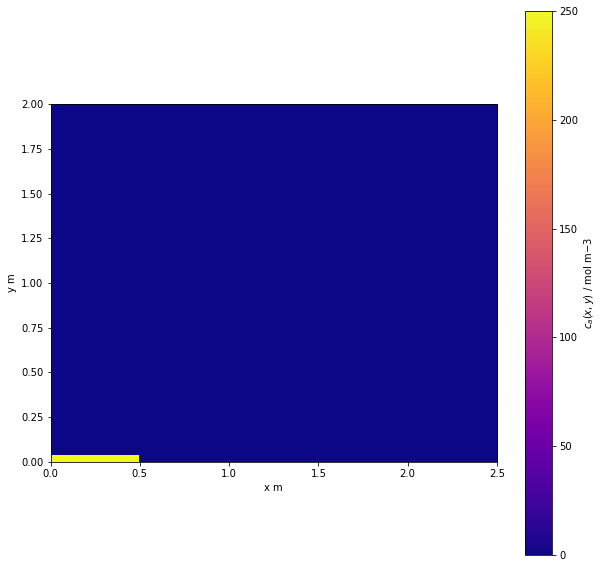

In [8]:
# Visualizar las condiciones de borde iniciales

fig=plt.subplots(figsize=[10,10])
plt.imshow(np.flipud(np.transpose(ca)),origin="upper",extent=[0,R2,0,lz],cmap="plasma")
plt.colorbar(label=r"$c_a(x,y)$ / mmol m${-3}$")
plt.xlabel("x m")
plt.ylabel("y m")
plt.show()

#### 7. Implementar algoritmo de iteración SOR

# SOR

In [9]:
omega = 1.2

# Criterio de convergencia
resid_crit = 1e-6

# Valor arbitrario al comienzo
resid_ave = 1

# Número de iteraciones
count = 0


while resid_ave > resid_crit:
   
    # Residuo viejo
    resid_old = resid_ave
    
    # Setear residuo promedio en 0 para sumar más adelante
    resid_ave = 0
    
    # Checker boarding
    cnt_points = 0
    
    
    # Loop sobre los puntos internos
    for i in range(0,Nr):
        for j in range(0,Nz):
            
            # Checker-boarding para garantizar convergencia
            if ((i+j)%2)==count%2:
                   
                #print("i =%.3f, j= %.3f" % (i,j))
                
                # Residuo
                
                if (i>0) & (i<Nr-1) & (j>0) & (j<Nz-1):
                    
                    # caso donde r<R1
                    if i<=nr1:
                    
                        a= -D/(2*dr*i*dr) - D/dr**2
                    
                        b= + D/(2*dr*i*dr) - D/dr**2
                        
                        # Coeficiente correspondiente a nodo vecino superior
                        c= -D/dz**2

                        # Coeficiente correspondiente a nodo vecino inferior
                        d= -v_z1/(2*dz)-D/dz**2

                        # Coeficiente correspondiente a nodo central
                        e= +2*D/dz**2 +2*D/dr**2 + v_z1/dz + k
                    # caso donde R1<r<R2
                    else:
                        a = -D/(2*dr*i*dr) - D/dr**2
                    
                        b = + D/(2*dr*i*dr) - D/dr**2
                        
                        # Coeficiente correspondiente a nodo vecino superior
                        c = -D/dz**2

                        # Coeficiente correspondiente a nodo vecino inferior
                        d = -v_z1/(2*dz)-D/dz**2

                        # Coeficiente correspondiente a nodo central
                        e = +2*D/dz**2 +2*D/dr**2 + v_z2/dz + k
                        

                    residual = a * ca[i+1,j] + b * ca[i-1,j] + c * ca[i,j+1]+ d * ca[i,j-1] + e * ca[i,j] - f
                    
            
                    # Actualizar el valor de T
                    if (ca[i,j] -omega*residual/e) >=0:
                        ca[i,j] += -omega*residual/e
            
                    

                    # Actualizar el promedio del residuo como la suma de residuos
                    resid_ave += abs(residual)
        
                        
                    # print(residual)
                cnt_points += 1
    
    # Actualización dinámica de condiciones de borde después de que la matriz solución completa
    # se actualizó (un ciclo de checkerboarding completo)
    if count%2==0:
        # CB1 Pared inferior con burbujas
        ca[1:nr1,0]=ca_0

        # CB2 Pared inferior sin burbujas
        ca[nr1:-1,0]=(4*ca[nr1:-1,1]-ca[nr1:-1,2])/3

        # CB3 Pared exterior
        # ca[:,-1]=(4*ca[:,-2]-ca[:,-3])/3
        ca[-1,:]=(4*ca[-2,:]-ca[-3,:])/3

        # CB4 Superficie del tanque
        ca[:,-1]=(4*ca[:,-2]-ca[:,-3])/3

        # CB5 Centro de la piscina
        ca[0,:]=(4*ca[1,:]-ca[2,:])/3



    resid = resid_ave/cnt_points
        
    # Imprimir cada 200 iteraciones
    if count%200==0:
        print("Residuo: %.3e "% resid_ave)
        # print("Delta res: %.3e" % (resid_ave - resid_old))
    
    # Contar iteraciones
    count = count + 1

Residuo: 1.641e-03 
Residuo: 1.928e-04 
Residuo: 1.177e-04 
Residuo: 8.386e-05 
Residuo: 6.399e-05 
Residuo: 5.090e-05 
Residuo: 4.164e-05 
Residuo: 3.475e-05 
Residuo: 2.942e-05 
Residuo: 2.516e-05 
Residuo: 2.168e-05 
Residuo: 1.877e-05 
Residuo: 1.630e-05 
Residuo: 1.420e-05 
Residuo: 1.239e-05 
Residuo: 1.082e-05 
Residuo: 9.459e-06 
Residuo: 8.273e-06 
Residuo: 7.238e-06 
Residuo: 6.335e-06 
Residuo: 5.545e-06 
Residuo: 4.855e-06 
Residuo: 4.250e-06 
Residuo: 3.721e-06 
Residuo: 3.259e-06 
Residuo: 2.853e-06 
Residuo: 2.498e-06 
Residuo: 2.188e-06 
Residuo: 1.916e-06 
Residuo: 1.678e-06 
Residuo: 1.469e-06 
Residuo: 1.286e-06 
Residuo: 1.126e-06 


#### 8. Visualizar solución del perfil de concentración 2-D 

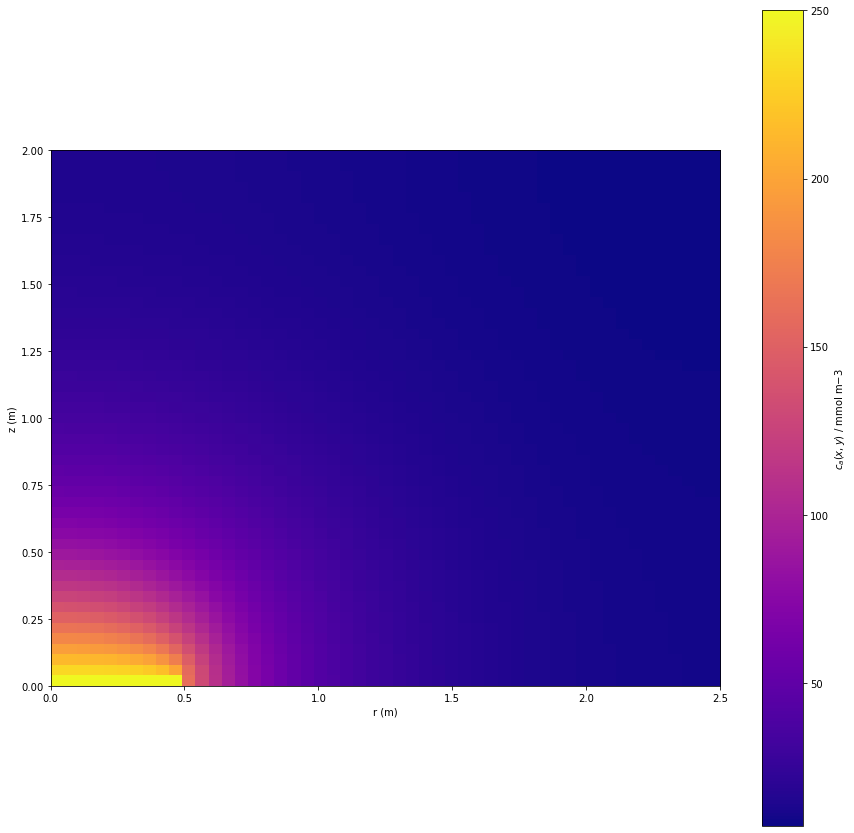

In [10]:
# Visualizamos la solución para la concentración de cloro en 2-D

fig=plt.subplots(figsize=[15,15])
plt.imshow(np.flipud(np.transpose(ca)),origin="upper",extent=[0,R2,0,lz],cmap="plasma")
plt.colorbar(label=r"$c_a(x,y)$ / mmol m${-3}$")
plt.xlabel("r (m)")
plt.ylabel("z (m)")
plt.show()


#### 9. Calcular zona muerta

In [11]:
c_lim= 1 / MW *1e3 # mmol/m3
print(c_lim)
C_zm=np.ones((Nr,Nz))*0

31.25


In [12]:
for i in range(Nr):
    for j in range(Nz):
        if ca[i,j]>=c_lim:
            C_zm[i,j]=1
        

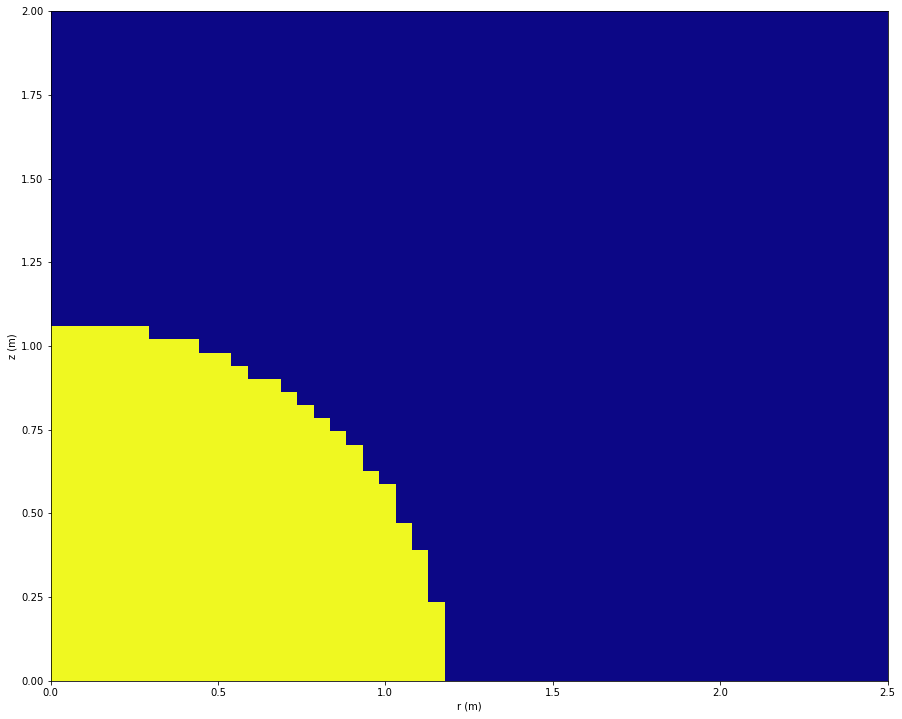

In [13]:
fig=plt.subplots(figsize=[15,15])
plt.imshow(np.flipud(np.transpose(C_zm)),origin="upper",extent=[0,R2,0,lz],cmap="plasma")
plt.xlabel("r (m)")
plt.ylabel("z (m)")
plt.show()


La zona muerta se encuentra en azul.